In [89]:
import os
import findspark

os.environ["SPARK_HOME"] = "C:\spark"
findspark.init()

# To display scroll:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Dicionário de Dados


<p><strong>Acousticness/Acústica</strong>: variável numérica; medida de confiança de 0,0 a 1,0 se a faixa é acústica. O 1.0 representa alta confiança de que a faixa é acústica.</p>
<p><strong>Danceability/Dançabilidade</strong>: variável numérica; a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos e 1,0 é o mais dançável.</p>
<p><strong>Duration_ms</strong>: variável numérica; a duração da trilha em milissegundos.</p>
<p><strong>Duration_min</strong>: variável numérica; a duração da faixa em minutos.</p>
<p><strong>Energy/Energia</strong>: variável numérica; energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.</p>
<p><strong>Explicit/Explícito</strong>: variável categórica; se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).</p>
<p><strong>Id</strong>: o ID do Spotify para a faixa.</p>
<p><strong>Instrumentalness/Instrumentalidade</strong>: variável numérica; prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.</p>
<p><strong>Key/Chave</strong>: variável numérica; a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo, 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.</p>
<p><strong>Liveness/Ao vivo</strong>: variável numérica; detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.</p>
<p><strong>Loudness/Volume em dB</strong>: variável numérica; volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som em relação à sua amplitude (“altura”), por medir a relação entre os picos e depressões de uma onda sonora. Os valores típicos variam entre -60 e 0 db.</p>
<p><strong>Mode/Modo</strong>: variável numérica; o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.</p>
<p><strong>Popularity/Popularidade</strong>: variável numérica; a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.</p>
<p><strong>Speechiness/Fala</strong>: variável numérica; detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música estilo rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.</p>
<p><strong>Tempo</strong>: variável numérica; tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.</p>
<p><strong>Valence/Valência</strong>: variável numérica; medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (como, triste, deprimida, irritada).</p>
<p><strong>Year/Ano</strong>: ano em que a música foi lançada.</p>

In [90]:
from pyspark.sql import SparkSession

In [91]:
sessao_spark = SparkSession.builder\
    .appName('Recomendador PySpark')\
    .getOrCreate()
sessao_spark

In [92]:
from pyspark import SparkFiles

In [93]:
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file:///' + SparkFiles.get('dados_musicas.csv')

In [94]:
path_dados_file

'file:///C:\\Users\\Pichau\\AppData\\Local\\Temp\\spark-7991bfba-d5cc-4b24-abb7-2f76eeedf0bf\\userFiles-2c529960-9d56-4bcb-912a-3d867346c30f\\dados_musicas.csv'

In [95]:
dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)

# Analysis

In [96]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [97]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [98]:
dados.count()

20311

In [99]:
len(dados.columns)

19

In [100]:
import pyspark.sql.functions as f

In [101]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [102]:
print(sorted(dados.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


# Analysis by Year

In [103]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

sessao_spark.sparkContext.addFile(url_anos_dados)
path_dados_file = 'file:///' + SparkFiles.get('dados_musicas_ano.csv')

dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [104]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [105]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [106]:
dados_anos.count()

21

In [107]:
len(dados_anos.columns)

14

In [108]:
import plotly.express as px

In [109]:
temp = dados_anos.toPandas()

fig = px.line(temp, x='year', y='loudness', markers=True, title='Variação do loudness conforme os anos')
fig.show()

In [110]:
import plotly.graph_objects as go

In [111]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))
fig.show()

# Matriz de correlação

In [112]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

# StarndardScaler and PCA

In [113]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = 'file:///' + SparkFiles.get('dados_musicas_genero.csv')
dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [114]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [115]:
dados_generos.count()

2973

In [116]:
dados_generos.select('genres').distinct().count()

2973

In [117]:
len(dados_generos.columns)

14

In [118]:
from pyspark.ml.feature import VectorAssembler

In [119]:
X = [col for col in dados_generos.columns if col != 'genres']
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [120]:
dados_generos_vector = VectorAssembler(inputCols=X, outputCol='features')\
    .transform(dados_generos).select(['features','genres'])

In [121]:
dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [122]:
from pyspark.ml.feature import StandardScaler

In [123]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [124]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [125]:
from pyspark.ml.feature import PCA

In [126]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
model_pca = pca.fit(dados_generos_scaler)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [127]:
dados_generos_pca.select('pca_features').show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.507095366888567,0.4381691373769795]   |
|[-0.5969679056633482,4.981612052751348]  |
|[-4.158460276223561,-0.836652508107994]  |
|[-2.387344878512217,-0.4877989015663402] |
|[-2.6501218371679087,-0.5756819768820469]|
|[-1.4965091203367626,1.8644183183717793] |
|[-3.9235207721573238,0.2851835002352837] |
|[-4.611011109831115,-0.6783790472312371] |
|[-2.8376900630842297,-0.5712993716580516]|
|[-2.706690139892783,-1.2593788079708297] |
|[-4.698331383924287,1.2765569680619446]  |
|[-3.3759874966798677,0.7560741064307468] |
|[-5.608998877066022,1.0427311644393218]  |
|[0.2954946352117687,-0.2763864586236307] |
|[-2.5725591062870423,-1.3169815431109795]|
|[-3.4008228020493454,0.5073029625781903] |
|[-4.366720316263419,-0.336482705977109]  |
|[-2.7254698167724003,0.5058604987046363] |
|[-4.958112358381605,1.2627579957290729]  |
|[-3.693495184642272,1.382276206

In [128]:
from pyspark.ml import Pipeline

In [129]:
pca_pipeline = Pipeline(stages=[
    VectorAssembler(inputCols=X, outputCol='features'),
    StandardScaler(inputCol='features', outputCol='scaled_features'),
    PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
])

In [130]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [131]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [132]:
dados_generos_pca.select('pca_features').show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.507095366888567,0.4381691373769795]   |
|[-0.5969679056633482,4.981612052751348]  |
|[-4.158460276223561,-0.836652508107994]  |
|[-2.387344878512217,-0.4877989015663402] |
|[-2.6501218371679087,-0.5756819768820469]|
|[-1.4965091203367626,1.8644183183717793] |
|[-3.9235207721573238,0.2851835002352837] |
|[-4.611011109831115,-0.6783790472312371] |
|[-2.8376900630842297,-0.5712993716580516]|
|[-2.706690139892783,-1.2593788079708297] |
|[-4.698331383924287,1.2765569680619446]  |
|[-3.3759874966798677,0.7560741064307468] |
|[-5.608998877066022,1.0427311644393218]  |
|[0.2954946352117687,-0.2763864586236307] |
|[-2.5725591062870423,-1.3169815431109795]|
|[-3.4008228020493454,0.5073029625781903] |
|[-4.366720316263419,-0.336482705977109]  |
|[-2.7254698167724003,0.5058604987046363] |
|[-4.958112358381605,1.2627579957290729]  |
|[-3.693495184642272,1.382276206

# Kmeans

In [133]:
from pyspark.ml.clustering import KMeans

In [134]:
SEED = 1224

In [135]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [136]:
model_kmeans = kmeans.fit(dados_generos_pca)

In [137]:
predictions_kmeans = model_kmeans.transform(dados_generos_pca)

In [138]:
predictions_kmeans.select('pca_features','cluster_pca').show(truncate=False)

+-----------------------------------------+-----------+
|pca_features                             |cluster_pca|
+-----------------------------------------+-----------+
|[2.507095366888567,0.4381691373769795]   |2          |
|[-0.5969679056633482,4.981612052751348]  |2          |
|[-4.158460276223561,-0.836652508107994]  |4          |
|[-2.387344878512217,-0.4877989015663402] |0          |
|[-2.6501218371679087,-0.5756819768820469]|0          |
|[-1.4965091203367626,1.8644183183717793] |2          |
|[-3.9235207721573238,0.2851835002352837] |4          |
|[-4.611011109831115,-0.6783790472312371] |1          |
|[-2.8376900630842297,-0.5712993716580516]|4          |
|[-2.706690139892783,-1.2593788079708297] |0          |
|[-4.698331383924287,1.2765569680619446]  |3          |
|[-3.3759874966798677,0.7560741064307468] |4          |
|[-5.608998877066022,1.0427311644393218]  |1          |
|[0.2954946352117687,-0.2763864586236307] |2          |
|[-2.5725591062870423,-1.3169815431109795]|0    

In [139]:
from pyspark.ml.functions import vector_to_array

In [140]:
pca_features_xy = predictions_kmeans\
    .withColumn('x', vector_to_array('pca_features')[0])\
    .withColumn('y', vector_to_array('pca_features')[1])\
    .select(['x','y','cluster_pca', 'genres'])

In [141]:
pca_features_xy.show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|              genres|
+-------------------+-------------------+-----------+--------------------+
|  2.507095366888567| 0.4381691373769795|          2|21st century clas...|
|-0.5969679056633482|  4.981612052751348|          2|               432hz|
| -4.158460276223561| -0.836652508107994|          4|               8-bit|
| -2.387344878512217|-0.4877989015663402|          0|                  []|
|-2.6501218371679087|-0.5756819768820469|          0|          a cappella|
|-1.4965091203367626| 1.8644183183717793|          2|            abstract|
|-3.9235207721573238| 0.2851835002352837|          4|      abstract beats|
| -4.611011109831115|-0.6783790472312371|          1|    abstract hip hop|
|-2.8376900630842297|-0.5712993716580516|          4|           accordeon|
| -2.706690139892783|-1.2593788079708297|          0|           accordion|
| -4.698331383924287| 1.2

In [142]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x','y', 'genres'])
fig.show()

In [143]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

# Grouping musics

In [144]:
X = [x for x in dados.columns if x not in ['artists','id','name','artists_song']]
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [145]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)

In [146]:
dados_encoded_vector.select("features").show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [147]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [148]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [149]:
k = len(X)
k

15

In [150]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicais_pca = model_pca.transform(dados_musicas_scaler)

In [151]:
model_pca.explainedVariance

DenseVector([0.213, 0.133, 0.0939, 0.0869, 0.0733, 0.0665, 0.0616, 0.0563, 0.0505, 0.0462, 0.0339, 0.0284, 0.0264, 0.0202, 0.0099])

In [152]:
sum(model_pca.explainedVariance) * 100

99.99999999999999

In [153]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[0.21297354127107343,
 0.34597741622955064,
 0.43989805678254446,
 0.5267820578269102,
 0.6001038103117928,
 0.6665719513652388,
 0.7282174213581727,
 0.7845103843321022,
 0.8350002357002613,
 0.8812446547406768,
 0.9151737562703046,
 0.9435370133056037,
 0.9699018569070159,
 0.9900947792885578,
 0.9999999999999999]

In [154]:
import numpy as np

In [155]:
k = int(sum(np.array(lista_valores) <= 0.7))

In [156]:
k

6

In [157]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [158]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775703,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810392]|
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.904352656713,-13.388401890587229,3.972980727830861] |
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]  |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]  |
|[-36.54556974907567,-167.37512505802482,-11.881276527236555,-136.27798590243984,-14.056847990344538,3.583390145779156]|
+-------------------------------

In [159]:
sum(model_pca.explainedVariance)*100

66.65719513652388

In [160]:
pca_pipeline = Pipeline(stages=[
    VectorAssembler(inputCols=X, outputCol='features'),
    StandardScaler(inputCol='features', outputCol='features_scaled'),
    PCA(k=6, inputCol='features_scaled', outputCol='pca_features'),
    KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)
])

In [161]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [162]:
projection = model_pca_pipeline.transform(dados)

In [163]:
projection.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [164]:
projection_kmeans = projection.withColumn('x',vector_to_array('pca_features')[0])\
    .withColumn('y',vector_to_array('pca_features')[1])

In [165]:
projection_kmeans.select(['x','y','cluster_pca','artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775703|-165.36848784906184|          8|   Coldplay - Yellow|
|-36.498857627749054|-167.85185045616558|          4|OutKast - Ms. Jac...|
|-35.460300916940554|-165.99633344577887|         35|Linkin Park - In ...|
| -35.56301325520583|-165.59515096480607|         16|3 Doors Down - Kr...|
| -36.54556974907567|-167.37512505802482|         34|Eminem - The Real...|
| -36.71322229026232|-166.48208483099708|         34|Disturbed - Down ...|
|-36.013246178822214|-166.63514920955342|         34| Nelly - Ride Wit Me|
|  -36.5426877121049|-166.97928234833242|         23|       Eminem - Stan|
| -36.42524900978431|-165.10535006330758|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577073|-166.03098838247917|         34|Britney Spears - ...|
|-31.639065936568752|  -1

In [166]:
fig = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

# Elbow

In [99]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [102]:
pca_pipeline = Pipeline(stages=[
    VectorAssembler(inputCols=X, outputCol='features'),
    StandardScaler(inputCol='features', outputCol='features_scaled'),
    PCA(k=6, inputCol='features_scaled', outputCol='pca_features'),
])
elbow = pca_pipeline.fit(dados).transform(dados)

In [108]:
wcss = []
for i in range(10,60):
    kmeans_dados_e = KMeans(k=i, featuresCol='pca_features', predictionCol='prediction', seed=SEED)
    predictions = kmeans_dados_e.fit(elbow).transform(elbow)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    # Append WCSS to list
    wcss.append(silhouette)

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
wcss

[-0.2758131727749158,
 -0.2788762034357289,
 -0.31356176134372965,
 -0.32252597165176305,
 -0.36943208933241994,
 -0.3505865806314804,
 -0.36647064212821007,
 -0.36736644806381924,
 -0.37289141345406746,
 -0.3902979610976315,
 -0.3715833253739244,
 -0.360193674117153,
 -0.37697431782348956,
 -0.3911520381477026,
 -0.3868156748591913,
 -0.399631331457202,
 -0.38834183886557855,
 -0.3847828792301043,
 -0.3835060750151825,
 -0.3992542352699684,
 -0.37420425582869465,
 -0.408890170914442,
 -0.41173814145723253,
 -0.4045052547761515,
 -0.40671143330283854,
 -0.4016355506603023,
 -0.40353665107360137,
 -0.4172519141222195,
 -0.41796234384161757,
 -0.3940876074349248,
 -0.4206213374816627,
 -0.41613434384439657,
 -0.43380431449988954,
 -0.43867069035910955,
 -0.42275454849481403,
 -0.4157835234046047,
 -0.4319103497161572,
 -0.4281951528921194,
 -0.4557491549542961,
 -0.4375535349147315,
 -0.4559251082960203,
 -0.4431449957043237,
 -0.4259686922204221,
 -0.45424926587662384,
 -0.4354396764974

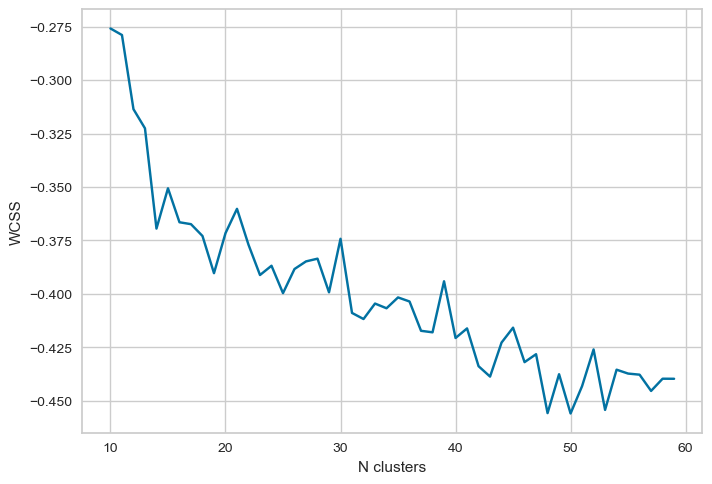

In [110]:
plt.plot(range(10,60), wcss)
plt.xlabel('N clusters')
plt.ylabel('WCSS')
plt.show()

# Using euclidian distance to recommend musics

In [167]:
nome_musica = 'Taylor Swift - Blank Space'

In [168]:
cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

3

In [169]:
musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
    .select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [170]:
componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
    .select("pca_features").collect()[0][0]
componentes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, -13.1234, 4.1374])

In [171]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType, StringType

In [172]:
def calcula_distance(value):
    return euclidean(componentes_musica, value)

udf_calculate_distance = f.udf(calcula_distance, FloatType())

In [173]:
musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calculate_distance('pca_features'))
                               
recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10))\
    .select(['artists_song','id','Dist'])

recomendadas.show()

Traceback (most recent call last):
  File "C:\spark\python\pyspark\serializers.py", line 458, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 602, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 692, in reducer_override
    return self._function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 565, in _function_reduce
    return self._dynamic_function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 546, in _dynamic_function_reduce
    state = _function_getstate(func)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  

PicklingError: Could not serialize object: IndexError: tuple index out of range

In [174]:
def recomendador(nome_musica):
    cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
    
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
        .select('artists_song', 'id', 'pca_features')
    
    componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
        .select("pca_features").collect()[0][0]
    
    musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calculate_distance('pca_features'))
                               
    recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10))\
        .select(['artists_song','id','Dist'])
    
    recomendadas.select('artists_song').show(truncate=False)

In [123]:
recomendador('Taylor Swift - Blank Space')

Traceback (most recent call last):
  File "C:\spark\python\pyspark\serializers.py", line 458, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 602, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 692, in reducer_override
    return self._function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 565, in _function_reduce
    return self._dynamic_function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\spark\python\pyspark\cloudpickle\cloudpickle_fast.py", line 546, in _dynamic_function_reduce
    state = _function_getstate(func)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  

PicklingError: Could not serialize object: IndexError: tuple index out of range

# Integrate with spotify

In [93]:
!pip install spotipy

                                              0.0/250.3 kB ? eta -:--:--
     ------------------------------------- 250.3/250.3 kB 16.0 MB/s eta 0:00:00


In [175]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [178]:
!pip install dotenv

  Using cached dotenv-0.0.5.tar.gz (2.4 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [85 lines of output]
  C:\Users\Pichau\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
    error: subprocess-exited-with-error
  
    python setup.py egg_info did not run successfully.
    exit code: 1
  
    [17 lines of output]
    Traceback (most recent call last):
      File "<string>", line 2, in <module>
      File "<pip-setuptools-caller>", line 14, in <module>
      File "C:\Users\Pichau\AppData\Local\Te

In [182]:
!pip install python-dotenv

  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)


In [183]:
import dotenv
dotenv.load_dotenv()

True

In [184]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
    scope=scope,
    redirect_uri="http://localhost:8080",
    client_id = os.environ['SPOTIFY_ID'],
    client_secret = os.environ['SPOTIFY_SECRET'])

In [185]:
client_credentials_manager = SpotifyClientCredentials(
    client_id = os.environ['SPOTIFY_ID'],
    client_secret = os.environ['SPOTIFY_SECRET'])

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [186]:
m_id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
m_id

'1p80LdxRV74UKvL8gnD7ky'

In [187]:
sp.track(m_id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [190]:
# Mock only because distance calc it is not working on windows
def recomendador_mock(nome_musica):
    cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
    
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
        .select('artists_song', 'id', 'pca_features')
                               
    recomendadas = musicas_recomendadas.limit(10)\
        .select(['artists_song','id'])
    
    recomendadas.select('artists_song').show(truncate=False)
    
    playlist_id = recomendadas.select('id').collect()
    
    playlist_track = []
    
    for id in playlist_id:
        playlist_track.append(sp.track(id[0]))
    
    return playlist_track

In [191]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):
    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
    plt.show()

C:\Users\Pichau\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [192]:
name = []
url = []
for track in recomendador_mock(nome_musica):
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

+----------------------------------------+
|artists_song                            |
+----------------------------------------+
|Usher - Yeah! (feat. Lil Jon & Ludacris)|
|Kelly Clarkson - Since U Been Gone      |
|Keyshia Cole - Love                     |
|Mariah Carey - We Belong Together       |
|Korn - Coming Undone                    |
|Chris Brown - Yo (Excuse Me Miss)       |
|Aventura - Un Beso                      |
|Chris Brown - Say Goodbye               |
|Red Hot Chili Peppers - Dani California |
|Craig Morgan - International Harvester  |
+----------------------------------------+



PermissionError: [WinError 32] O arquivo já está sendo usado por outro processo: 'C:\\Users\\Pichau\\AppData\\Local\\Temp\\tmpoonl781q'

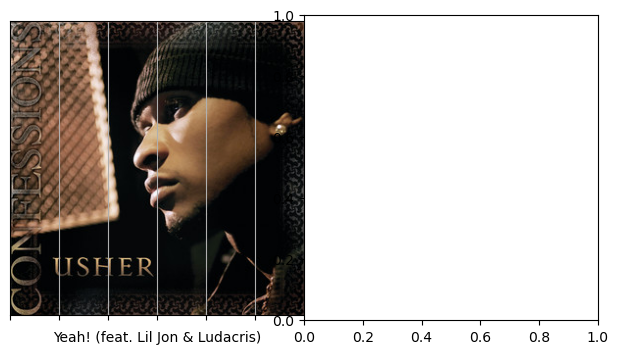

In [193]:
visualize_songs(name, url)